In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
tf.reset_default_graph()

In [5]:
# 784
# 392
# 196
# 392
# 784

In [6]:
num_inputs = 784
neurons_hidden_1 = 392
neurons_hidden_2 = 196
neurons_hidden_3 = neurons_hidden_1
num_outputs = num_inputs

In [7]:
learning_rate = 0.01

In [8]:
act_func = tf.nn.relu

In [9]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [10]:
initializer = tf.variance_scaling_initializer()

In [11]:
w1 = tf.Variable(initializer([num_inputs, neurons_hidden_1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hidden_1, neurons_hidden_2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hidden_2, neurons_hidden_3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hidden_3, num_outputs]), dtype=tf.float32)

In [12]:
b1 = tf.Variable(tf.zeros(neurons_hidden_1))
b2 = tf.Variable(tf.zeros(neurons_hidden_2))
b3 = tf.Variable(tf.zeros(neurons_hidden_3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [13]:
hidden_layer1 = act_func(tf.matmul(X, w1) + b1)
hidden_layer2 = act_func(tf.matmul(hidden_layer1, w2) + b2)
hidden_layer3 = act_func(tf.matmul(hidden_layer2, w3) + b3)
output_layer = act_func(tf.matmul(hidden_layer3, w4) + b4)

In [14]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [16]:
train = optimizer.minimize(loss)

In [17]:
init = tf.global_variables_initializer()

In [18]:
saver = tf.train.Saver()

In [19]:
num_epochs = 20
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(train, feed_dict={X: X_batch})
        
        training_loss = loss.eval(feed_dict={X: X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch, training_loss))
    
    saver.save(sess, "./models/stack-autoencoder")

EPOCH: 0 LOSS: 0.04577361419796944
EPOCH: 1 LOSS: 0.04445371404290199
EPOCH: 2 LOSS: 0.04304656758904457
EPOCH: 3 LOSS: 0.04247501119971275
EPOCH: 4 LOSS: 0.04488004744052887
EPOCH: 5 LOSS: 0.04142510145902634
EPOCH: 6 LOSS: 0.04159848019480705
EPOCH: 7 LOSS: 0.04549770802259445
EPOCH: 8 LOSS: 0.0419754758477211
EPOCH: 9 LOSS: 0.04348474368453026
EPOCH: 10 LOSS: 0.044911377131938934
EPOCH: 11 LOSS: 0.03823717311024666
EPOCH: 12 LOSS: 0.04348140209913254
EPOCH: 13 LOSS: 0.04151134565472603
EPOCH: 14 LOSS: 0.043700605630874634
EPOCH: 15 LOSS: 0.04369416832923889
EPOCH: 16 LOSS: 0.039187055081129074
EPOCH: 17 LOSS: 0.041103947907686234
EPOCH: 18 LOSS: 0.04220033437013626
EPOCH: 19 LOSS: 0.04095900058746338


In [20]:
num_test_images = 10

with tf.Session() as sess:
    saver.restore(sess, "./models/stack-autoencoder")
    
    results = output_layer.eval(feed_dict={
        X: mnist.test.images[:num_test_images]
    })

INFO:tensorflow:Restoring parameters from ./models/stack-autoencoder


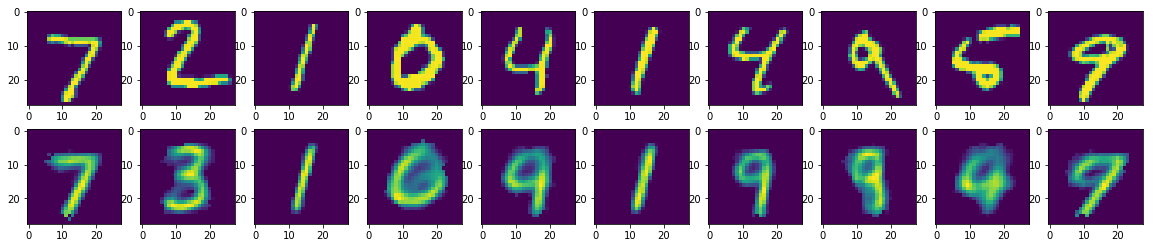

In [21]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

In [22]:
num_test_images = 10

with tf.Session() as sess:
    saver.restore(sess, "./models/stack-autoencoder")
    
    results = hidden_layer2.eval(feed_dict={
        X: mnist.test.images[:num_test_images]
    })

INFO:tensorflow:Restoring parameters from ./models/stack-autoencoder


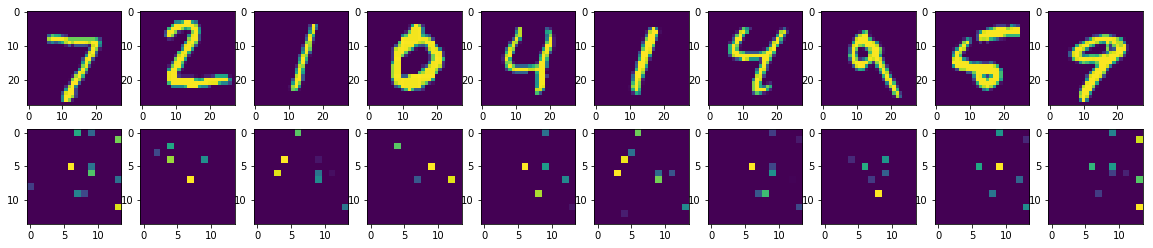

In [23]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (14, 14)))